In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

### PROCESS

In [4]:
def process(src):
    
    # PLACEHOLDER CONTAINERS
    features = []
    labels = []
    
    # OPEN & LOOP THROUGH FILE ROWS
    with open(src) as file:
        reader = csv.reader(file, delimiter=',')
        for row in reader:
            
            # APPEND TO CONTAINERS
            features.append(row[:-1])
            labels.append(row[-1])
    
    # CONVERT BOTH TO NUMPY ARRAYS & RETURN
    return features[1:], labels[1:]

### MODEL

In [19]:
def create_model(settings, features, labels):
    
    # INSTANTIATE & FIT THE SCALER
    scaler = MinMaxScaler()
    scaler.fit(features)
    
    # NORMALIZE FEATURES, THEN CONVERT LABELS TO NUMPY ARRAY
    features = scaler.transform(features)
    labels = np.asarray(labels, dtype = np.float32)
    
    # CREATE THE BASELINE MODEL
    model = Sequential()
    
    # ADD INPUT LAYER
    model.add(Dense(
        32,
        activation = 'relu',
        input_shape = (features.shape[1],)
    ))
    
    # ADD HIDDEN LAYER
    model.add(Dense(
        32,
        activation = 'relu'
    ))
    
    # ADD OUTPUT LAYER
    model.add(Dense(
        1,
        activation = 'sigmoid'
    ))
    
    # COMPILE IT
    model.compile(
        loss = settings['loss'],
        optimizer = settings['optimizer'],
        metrics = ['accuracy']
    )
    
    # FIT IT
    fitting = model.fit(
        features,
        labels,
        epochs = settings['epochs'],
        batch_size = settings['batch'],
        validation_split = settings['split']
    )
    
    return {
        'classifier': model,
        'history': fitting.history,
        'normalizer': scaler
    }

In [6]:
def inspect(model):
    
    # FIND NUMBER OF EPOCHS
    epochs = range(1, len(model['history']['accuracy']) + 1)
    
    # CREATE FIGURE BASE
    plt.figure(figsize=(15,6))
    
    # SET BOTH LINES
    plt.plot(epochs, model['history']['loss'], 'b', label = 'Training')
    plt.plot(epochs, model['history']['val_loss'], 'b', label = 'Validation', color='red')
    
    # SET LABELS & LEGEND
    plt.xlabel('Epochs')
    plt.ylabel('Loss Percent')
    plt.legend()
    
    # FINALLY SHOW
    plt.show()

In [46]:
def predict(feature, model):
    
    # NORMALIZE FEATURE
    feature = model['normalizer'].transform([feature])
    
    # RETURN THE PREDICTION RESULT
    return model['classifier'].predict(feature)[0][0]

### ASSIGNMENT

In [8]:
features, labels = process('data.csv')

In [9]:
model = create_model({
    'loss': 'binary_crossentropy',
    'optimizer': 'sgd',
    'epochs': 100,
    'batch': 32,
    'split': 0.2
}, features, labels)

Train on 1168 samples, validate on 292 samples
Epoch 1/100
1168/1168 [==============================] - 0s 262us/sample - loss: 0.7028 - accuracy: 0.3647 - val_loss: 0.6959 - val_accuracy: 0.3836
Epoch 2/100
1168/1168 [==============================] - 0s 36us/sample - loss: 0.6918 - accuracy: 0.4538 - val_loss: 0.6852 - val_accuracy: 0.4863
Epoch 3/100
1168/1168 [==============================] - 0s 35us/sample - loss: 0.6802 - accuracy: 0.5437 - val_loss: 0.6744 - val_accuracy: 0.5685
Epoch 4/100
1168/1168 [==============================] - 0s 34us/sample - loss: 0.6710 - accuracy: 0.5771 - val_loss: 0.6674 - val_accuracy: 0.6336
Epoch 5/100
1168/1168 [==============================] - 0s 34us/sample - loss: 0.6639 - accuracy: 0.6413 - val_loss: 0.6605 - val_accuracy: 0.7021
Epoch 6/100
1168/1168 [==============================] - 0s 84us/sample - loss: 0.6565 - accuracy: 0.7423 - val_loss: 0.6538 - val_accuracy: 0.7260
Epoch 7/100
1168/1168 [==============================] - 0s 35us

Epoch 56/100
1168/1168 [==============================] - 0s 35us/sample - loss: 0.3028 - accuracy: 0.8810 - val_loss: 0.3392 - val_accuracy: 0.8664
Epoch 57/100
1168/1168 [==============================] - 0s 33us/sample - loss: 0.3007 - accuracy: 0.8818 - val_loss: 0.3375 - val_accuracy: 0.8664
Epoch 58/100
1168/1168 [==============================] - 0s 33us/sample - loss: 0.2987 - accuracy: 0.8836 - val_loss: 0.3367 - val_accuracy: 0.8733
Epoch 59/100
1168/1168 [==============================] - 0s 35us/sample - loss: 0.2972 - accuracy: 0.8836 - val_loss: 0.3349 - val_accuracy: 0.8664
Epoch 60/100
1168/1168 [==============================] - 0s 34us/sample - loss: 0.2956 - accuracy: 0.8844 - val_loss: 0.3346 - val_accuracy: 0.8699
Epoch 61/100
1168/1168 [==============================] - 0s 34us/sample - loss: 0.2940 - accuracy: 0.8836 - val_loss: 0.3323 - val_accuracy: 0.8664
Epoch 62/100
1168/1168 [==============================] - 0s 34us/sample - loss: 0.2918 - accuracy: 0.8861

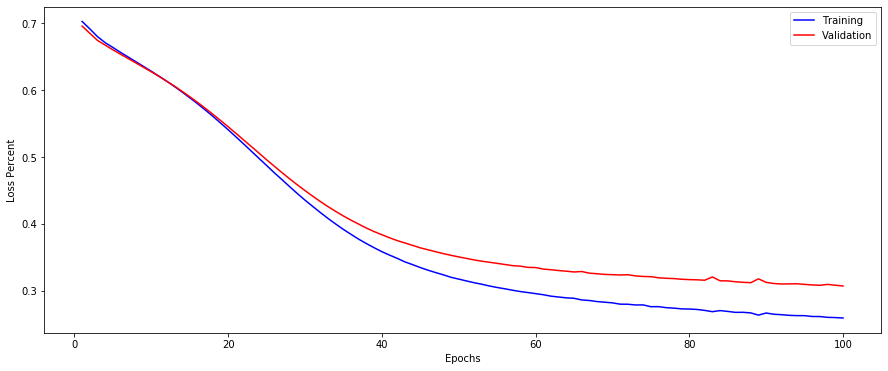

In [10]:
inspect(model)

In [44]:
prediction = predict(['14260', '8', '5', '1145', '2', '1', '4', '9', '1', '836'], model)

In [45]:
print(prediction)

0.99337786
